In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sampleSubmission.csv', 'test.csv']


In [2]:
train = pd.read_csv("../input/train.csv", parse_dates = ["datetime"])
test = pd.read_csv("../input/test.csv", parse_dates = ["datetime"])

train["year"] = train["datetime"].dt.year
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek

test["year"] = test["datetime"].dt.year
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek

In [3]:
train.info() # train.shape, train.isnull().sum(), train.dtypes 한눈에 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
hour          10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 1.2 MB


In [4]:
train.describe() # 치우침, 아웃라이어, 특성마다 숫자형인지 범주형인지 확인

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,23.000000,6.000000


In [5]:
train['temp'].value_counts().sort_index() # 숫자의 의미가 어느정도 있는 범주형 특성(binning)

0.82       7
1.64       2
2.46       5
3.28      11
4.10      44
4.92      60
5.74     107
6.56     146
7.38     106
8.20     229
9.02     248
9.84     294
10.66    332
11.48    181
12.30    385
13.12    356
13.94    413
14.76    467
15.58    255
16.40    400
17.22    356
18.04    328
18.86    406
19.68    170
20.50    327
21.32    362
22.14    403
22.96    395
23.78    203
24.60    390
25.42    403
26.24    453
27.06    394
27.88    224
28.70    427
29.52    353
30.34    299
31.16    242
31.98     98
32.80    202
33.62    130
34.44     80
35.26     76
36.08     23
36.90     46
37.72     34
38.54      7
39.36      6
41.00      1
Name: temp, dtype: int64

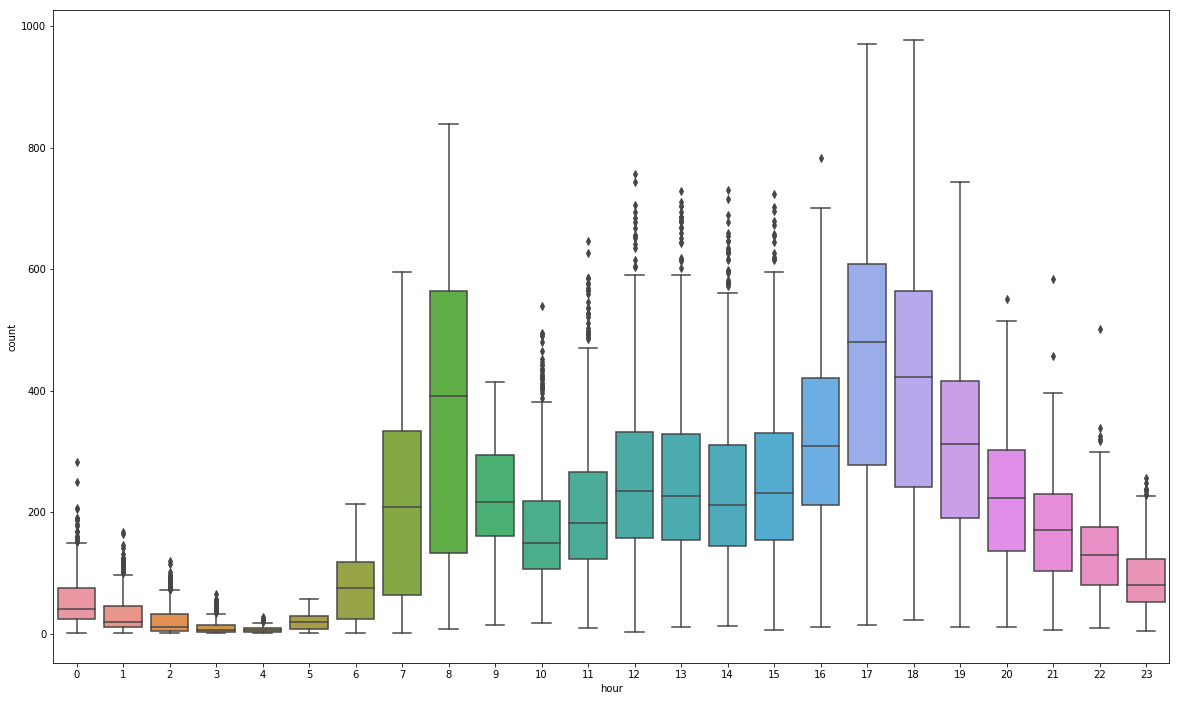

In [6]:
import seaborn as sns
import matplotlib.pylab as plt

_, axes = plt.subplots(1,1, figsize = (20,12))
sns.boxplot(x=train["hour"], y=train["count"])

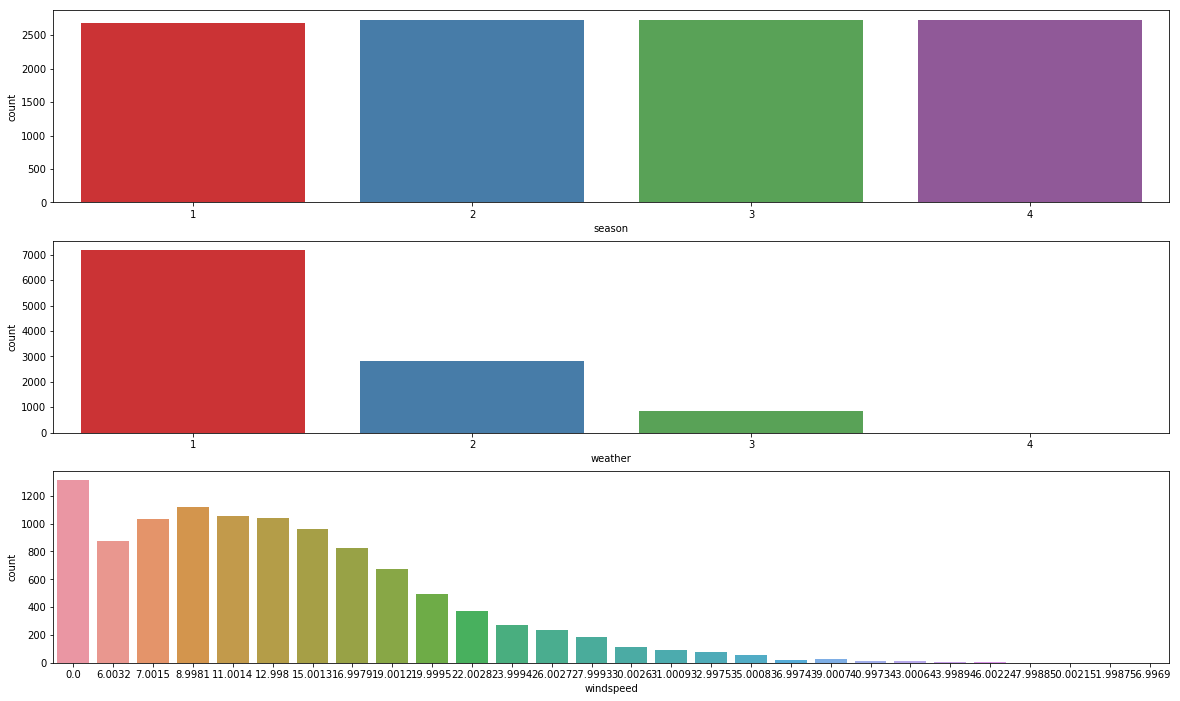

In [7]:
fig, axes = plt.subplots(3,1, figsize = (20,12))

sns.countplot(train["season"], ax = axes[0], palette="Set1")
sns.countplot(train["weather"], ax = axes[1], palette="Set1")
sns.countplot(train["windspeed"], ax = axes[2])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

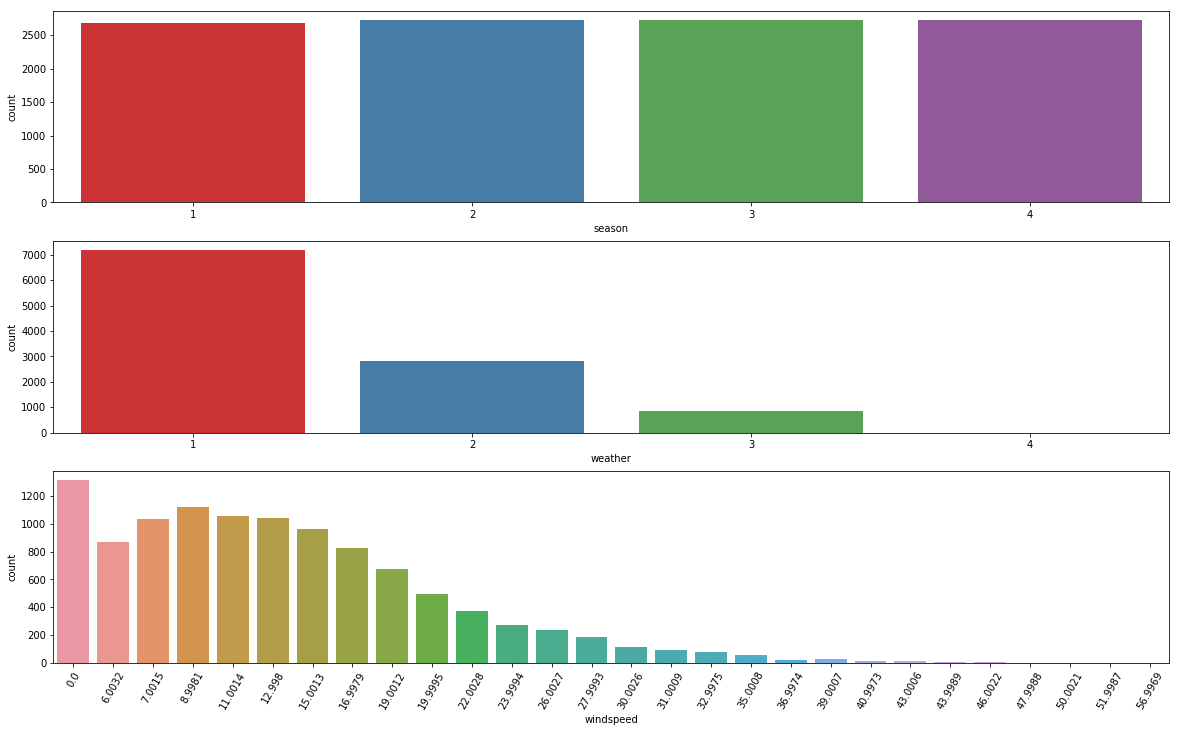

In [8]:
fig, axes = plt.subplots(3,1, figsize = (20,12))

sns.countplot(train["season"], ax = axes[0], palette="Set1")
sns.countplot(train["weather"], ax = axes[1], palette="Set1")
sns.countplot(train["windspeed"], ax = axes[2])
plt.xticks(rotation = 60, )

In [9]:
y_casual = np.log1p(train.casual)
y_registered = np.log1p(train.registered)
#y_train = np.log1p(train["count"])

train.drop(["datetime", "windspeed", "casual", "registered", "count"], 1, inplace=True)
test.drop(["datetime", "windspeed", ], 1, inplace=True)

In [10]:
import lightgbm as lgb
hyperparameters = { 'colsample_bytree': 0.725,  'learning_rate': 0.013,
                    'num_leaves': 56, 'reg_alpha': 0.754, 'reg_lambda': 0.071, 
                    'subsample': 0.523, 'n_estimators': 1093}
model = lgb.LGBMRegressor(**hyperparameters)
model.fit(train, y_casual)
preds1 = model.predict(test)

hyperparameters = { 'colsample_bytree': 0.639,  'learning_rate': 0.011,
                    'num_leaves': 30, 'reg_alpha': 0.351, 'reg_lambda': 0.587,
                   'subsample': 0.916, 'n_estimators': 2166}
model = lgb.LGBMRegressor(**hyperparameters, )
model.fit(train, y_registered)
preds2 = model.predict(test)

submission=pd.read_csv("../input/sampleSubmission.csv")
submission["count"] = np.expm1(preds1) + np.expm1(preds2)
#submission.to_csv("allrf.csv", index=False)

In [11]:
#미국 현충일
submission.iloc[1258:1269, 1]= submission.iloc[1258:1269, 1]*0.5
submission.iloc[4492:4515, 1]= submission.iloc[4492:4515, 1]*0.5
#크리스마스 이브
submission.iloc[6308:6330, 1]= submission.iloc[6308:6330, 1]*0.5
submission.iloc[3041:3063, 1]= submission.iloc[3041:3063, 1]*0.5
#크리스마스
submission.iloc[6332:6354, 1]= submission.iloc[6332:6354, 1]*0.5
submission.iloc[3065:3087, 1]= submission.iloc[3065:3087, 1]*0.5
#추수감사절
submission.iloc[5992:6015, 1]= submission.iloc[5992:6015, 1]*0.5
submission.iloc[2771:2794, 1]= submission.iloc[2771:2794, 1]*0.5

In [12]:
submission.iloc[6332:6354]

,datetime,count
6332,2012-12-25 07:00:00,21.338051
6333,2012-12-25 08:00:00,68.345009
6334,2012-12-25 09:00:00,70.312959
6335,2012-12-25 10:00:00,69.460655
6336,2012-12-25 11:00:00,76.869401
6337,2012-12-25 12:00:00,86.562772
6338,2012-12-25 13:00:00,96.594445
6339,2012-12-25 14:00:00,98.024865
6340,2012-12-25 15:00:00,89.702941
6341,2012-12-25 16:00:00,100.219779


In [13]:
submission.to_csv("lgb.csv", index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 